# Simple Linear Regression. Minimal example

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


## Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce

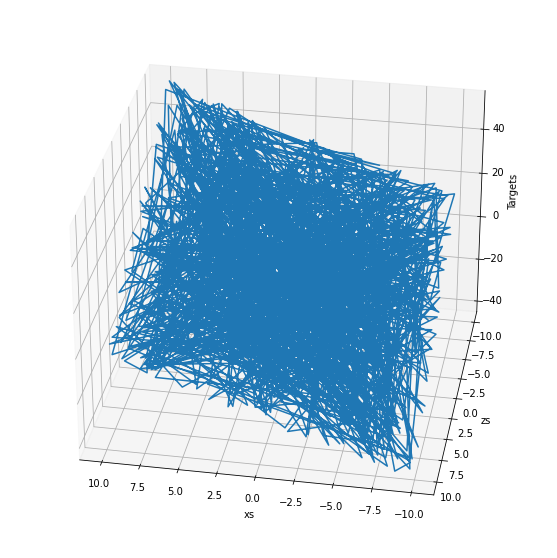

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure(figsize=(20,10))

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

plt.show()
targets = targets.reshape(observations, 1)
xs = xs.reshape(observations, 1)
zs = zs.reshape(observations, 1)

## Initialize variables

In [5]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[-0.09822627]
 [ 0.05487072]]
[0.09668825]


## Set a learning rate

In [6]:
learning_rate = 0.02

## Train the Model

In [19]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets

    loss = np.sum(deltas**2) / 2 / observations

    print(loss)

    deltas_scaled = deltas / observations

    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.16738283569567952
0.16738283568121148
0.16738283566731588
0.16738283565397002
0.1673828356411523
0.16738283562884157
0.16738283561701797
0.16738283560566217
0.1673828355947557
0.1673828355842806
0.16738283557422007
0.16738283556455757
0.16738283555527736
0.1673828355463643
0.16738283553780395
0.16738283552958216
0.1673828355216858
0.16738283551410174
0.16738283550681785
0.16738283549982208
0.1673828354931031
0.16738283548664998
0.16738283548045224
0.1673828354744996
0.1673828354687825
0.16738283546329163
0.1673828354580179
0.167382835452953
0.16738283544808832
0.1673828354434163
0.16738283543892896
0.16738283543461924
0.16738283543048005
0.16738283542650453
0.16738283542268637
0.16738283541901927
0.16738283541549726
0.16738283541211463
0.16738283540886573
0.16738283540574542
0.16738283540274865
0.1673828353998704
0.16738283539710597
0.16738283539445092
0.167382835391901
0.16738283538945187
0.1673828353870997
0.16738283538484064
0.16738283538267085
0.16738283538058696
0.16738283537858

## Print weights and biases and see if we have worked correctly

In [20]:
print(weights, biases)

[[ 1.99948464]
 [-2.99789482]] [5.00106829]


## Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are

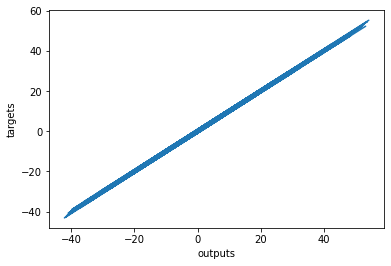

In [22]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()